In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
# select files and load from a directory
from glob import glob

In [3]:
#files = glob('C:\R_wd\*.csv')
files = glob('C:\Temp\DMMT\T*.csv')
#files.sort()
files

['C:\\Temp\\DMMT\\TestSet_1803_1807.csv',
 'C:\\Temp\\DMMT\\TrainSet_1701_1802.csv']

In [4]:
df = pd.concat( (pd.read_csv(file,dtype={'Gender':str,'rank_INDEX14':str,'rank_INDEX18':str,'rank_INDEX23':str,\
                                         'rank_INDEX27':str,'rank_INDEX28':str,'rank_INDEX29':str,'rank_INDEX32':str,\
                                         'rank_INDEX44':str,
                                         'rank_INDEX93':str,
                                         #'rank_AVG_AMT_6M':float,
                                         'Q2':str,'Q7':str,'Q8':str,'Q18':str,'Q22':str,'Q38':str}) \
                 for file in files),ignore_index=True)
df

,AgentID,Tgt_3YN,Tgt_6YN,Age_Grp,Gender,Apply_CH,re_hire_freq_grp,Q2,Q7,Q8,...,rank_INDEX14,rank_INDEX18,rank_INDEX23,rank_INDEX27,rank_INDEX28,rank_INDEX29,rank_INDEX32,rank_INDEX44,rank_INDEX93,rank_AVG_AMT_6M
0,A3000342,0,0,40G,2,MGM,1,3,2,7,...,1,1,1,2,2,1,2,2,3,1
1,A3000515,1,1,40G,2,Vender,1,2,2,3,...,2,1,1,1,2,2,1,1,1,0
2,A3000861,0,0,5060G,2,MGM,1,3,2,3,...,1,2,2,2,2,3,3,3,2,8
3,A3000887,1,1,30G,2,MGM,1,1,1,6,...,2,3,1,0,0,1,0,0,2,9
4,A3001025,1,1,40G,2,MGM,1,3,1,7,...,1,3,2,2,3,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2396,1675,1,1,5060G,2,MGM,0,4,2,3,...,2,0,0,0,1,2,0,0,1,9
2397,1676,0,0,5060G,2,MGM,0,4,1,7,...,1,3,3,2,2,1,3,3,3,5
2398,1677,0,1,5060G,2,MGM,0,3,2,3,...,1,3,3,3,2,2,2,2,3,5
2399,1678,0,1,5060G,1,MGM,0,1,2,4,...,1,0,3,3,2,0,0,0,1,6


# Feature Selection

In [5]:
mdf = pd.DataFrame(df,columns=['Tgt_3YN','Age_Grp','Gender','Apply_CH','Q2','Q7','Q8','Q18','Q22','Q38','rank_INDEX14','rank_INDEX18','rank_INDEX44','rank_INDEX93','rank_AVG_AMT_6M'])
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Tgt_3YN          2401 non-null   int64 
 1   Age_Grp          2401 non-null   object
 2   Gender           2401 non-null   object
 3   Apply_CH         2401 non-null   object
 4   Q2               2401 non-null   object
 5   Q7               2401 non-null   object
 6   Q8               2401 non-null   object
 7   Q18              2401 non-null   object
 8   Q22              2401 non-null   object
 9   Q38              2401 non-null   object
 10  rank_INDEX14     2373 non-null   object
 11  rank_INDEX18     2373 non-null   object
 12  rank_INDEX44     2373 non-null   object
 13  rank_INDEX93     2373 non-null   object
 14  rank_AVG_AMT_6M  2401 non-null   int64 
dtypes: int64(2), object(13)
memory usage: 281.5+ KB


In [ ]:
mdf.isna().sum()

# Data Split - Train / Test Set

In [6]:
from sklearn.impute import SimpleImputer  # --> missing value replacement

from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
#from sklearn.preprocessing import LabelEncoder  --> don't use!!!

from sklearn.tree import DecisionTreeClassifier # to build a classification tree
from sklearn.neighbors import KNeighborsClassifier # k-nearest neighbor 
from sklearn.linear_model import LogisticRegression # Loigistic Regression

In [7]:
X = mdf.drop('Tgt_3YN',axis='columns').copy()
y = mdf['Tgt_3YN'].copy()

In [8]:
mdf

,Tgt_3YN,Age_Grp,Gender,Apply_CH,Q2,Q7,Q8,Q18,Q22,Q38,rank_INDEX14,rank_INDEX18,rank_INDEX44,rank_INDEX93,rank_AVG_AMT_6M
0,0,40G,2,MGM,3,2,7,2,6,2,1,1,2,3,1
1,1,40G,2,Vender,2,2,3,4,6,1,2,1,1,1,0
2,0,5060G,2,MGM,3,2,3,3,5,2,1,2,3,2,8
3,1,30G,2,MGM,1,1,6,2,2,1,2,3,0,2,9
4,1,40G,2,MGM,3,1,7,2,1,2,1,3,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2396,1,5060G,2,MGM,4,2,3,1,6,1,2,0,0,1,9
2397,0,5060G,2,MGM,4,1,7,1,5,1,1,3,3,3,5
2398,0,5060G,2,MGM,3,2,3,1,5,2,1,3,2,3,5
2399,0,5060G,1,MGM,1,2,4,2,3,1,1,0,0,1,6


In [9]:
num_cols = X.select_dtypes(include=np.number).columns
#num_cols = ['rank_INDEX93','rank_AVG_AMT_6M']

#cat_cols = X.select_dtypes(exclude=np.number).columns
cat_cols_ohe = ['Gender','Apply_CH','Q2','Q7','Q8','Q18','Q22','Q38']
cat_cols_ode = ['Age_Grp','rank_INDEX14','rank_INDEX18','rank_INDEX44','rank_INDEX93']

In [10]:
num_transform = make_pipeline(SimpleImputer(missing_values=np.nan, strategy='median'))


cat_transform_ohe = make_pipeline(
                        (SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                        (OneHotEncoder()))
cat_transform_ode = make_pipeline(
                        (SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='1')),
                        (OrdinalEncoder()))
    
preprocessor = make_column_transformer(
                       (num_transform, num_cols),
                       (cat_transform_ohe, cat_cols_ohe),
                       (cat_transform_ode, cat_cols_ode),
                        remainder='passthrough')

clf = make_pipeline( preprocessor,
                     DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_leaf=8))
                   #  KNeighborsClassifier(n_neighbors=5))
                   #  LogisticRegression(solver='liblinear'))

In [11]:
from sklearn.model_selection import cross_val_score

In [12]:
# model performance by cross validation
cross_val_score(clf, X, y, scoring='accuracy' ,cv=5)  #scoring='roc_auc'

array([0.76923077, 0.72916667, 0.73958333, 0.775     , 0.74166667])

# Data Split for building model 

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# Train Set & Validation Set 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=365)

In [15]:
clf.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['rank_AVG_AMT_6M'], dtype='object')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['Gende...'Q2',
                                                   'Q7', 'Q8'

In [16]:
# prediction result
pred_class=clf.predict(X_test)
pred_prob=clf.predict_proba(X_test)
pred_prob

array([[0.37068966, 0.62931034],
       [0.56880734, 0.43119266],
       [0.95275591, 0.04724409],
       [0.88105727, 0.11894273],
       [0.82316119, 0.17683881],
       [0.56880734, 0.43119266],
       [0.56521739, 0.43478261],
       [0.8490566 , 0.1509434 ],
       [0.82316119, 0.17683881],
       [0.82316119, 0.17683881],
       [0.67692308, 0.32307692],
       [0.67692308, 0.32307692],
       [0.85      , 0.15      ],
       [0.82316119, 0.17683881],
       [0.11764706, 0.88235294],
       [0.56880734, 0.43119266],
       [0.56880734, 0.43119266],
       [0.8490566 , 0.1509434 ],
       [0.37068966, 0.62931034],
       [0.84126984, 0.15873016],
       [0.61290323, 0.38709677],
       [0.67692308, 0.32307692],
       [0.82316119, 0.17683881],
       [0.88105727, 0.11894273],
       [0.82316119, 0.17683881],
       [0.88105727, 0.11894273],
       [0.88105727, 0.11894273],
       [0.88105727, 0.11894273],
       [0.88105727, 0.11894273],
       [0.8490566 , 0.1509434 ],
       [0.

In [17]:
import matplotlib.pyplot as plt # to draw graphs
import seaborn as sns
%matplotlib inline

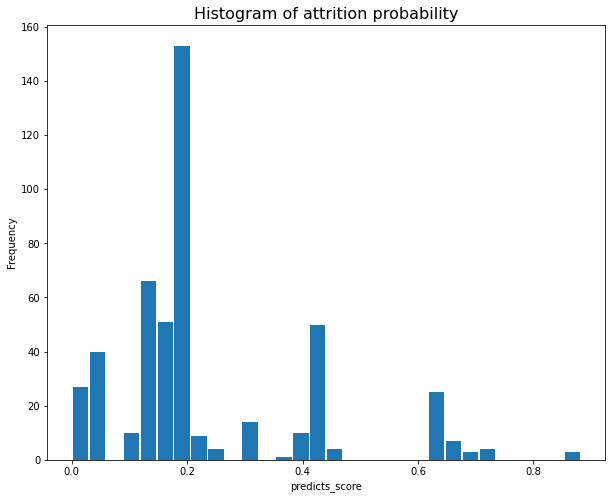

In [18]:
plt.figure(figsize=(10,8))

#sns.displot(clf.predict_proba(X_test)[:,1], kde=True)
plt.hist(pred_prob[:,1], bins=30, density=False, rwidth=0.9)
#plt.grid(axis='y', alpha=0.75)
plt.xlabel('predicts_score')
plt.ylabel('Frequency')
plt.title('Histogram of attrition probability', fontsize=16)
plt.show()

# Model Performance : Accuracy / AUC

In [19]:
from sklearn.metrics import accuracy_score, roc_auc_score

### Accuracy Score

In [20]:
accuracy_score(y_test, clf.predict(X_test))

0.7463617463617463

### AUC(Area Under Curve)

In [ ]:
roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])